# Data Collection 

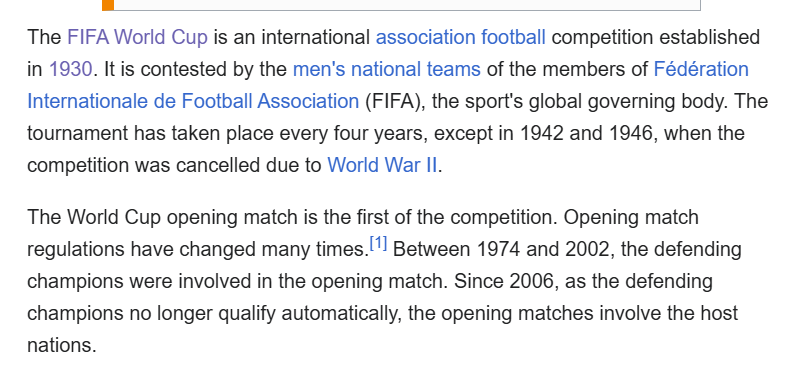

# World Cup Data Project (1930 - Present)

## Problem:
The data for each World Cup is on separate pages, so I need to scrape each tournament individually.

## Solution:
I will create a **function** that:
1. Takes the year of the World Cup as input.
2. Scrapes the required data (teams, results, dates, etc.) from the page.
3. Returns the data in a structured format.

## Plan:
1. **Analyze URLs**: Check if they follow a consistent pattern to generate them dynamically.
2. **Build the function**: Use `requests` and `BeautifulSoup` to fetch and parse the data for a given year.
3. **Loop through years**: Run the function for all World Cup years (1930 onwards).
4. **Save the data**: Store everything in a CSV file for analysis.

## Next Step:

Test the function on one tournament (e.g., 2022) before applying it to all years.


### https://en.wikipedia.org/wiki/200n_FIFA_World_Cup
- n-> years
-  Early years (1930–1970)
- Defending champion era (1974–2002)
- Host country era (2006–)

In [17]:
Years=[1930,1934,1938,1950,1954,1958,1962,1966,1970,1974,1978,1982,1986,1990,1994,1998,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022,2024]

In [18]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [19]:
# choose the start website Randomly 
response=requests.get('https://en.wikipedia.org/wiki/2022_FIFA_World_Cup#')
response

<Response [200]>

In [20]:
html_text=response.content
soup=BeautifulSoup(html_text,'html.parser')
soup.prettify()


'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   2022 FIFA World Cup - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-lim

In [21]:
Matches=soup.find_all('div',{"class":"footballbox"})

In [22]:
Matches

[<div class="footballbox" itemscope="" itemtype="http://schema.org/SportsEvent">
 <div class="fleft"><time><div class="fdate">20 November 2022<span style="display:none"> (<span class="bday dtstart published updated itvstart">2022-11-20</span>)</span></div><div class="ftime">19:00</div></time></div><table class="fevent"><tbody><tr itemprop="name">
 <th class="fhome" itemprop="homeTeam" itemscope="" itemtype="http://schema.org/SportsTeam"><span itemprop="name"><a href="/wiki/Qatar_national_football_team" title="Qatar national football team">Qatar</a><span class="flagicon"> <span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="550" data-file-width="1400" decoding="async" height="9" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/23px-Flag_of_Qatar.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/35px-Flag_of_Qatar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thum

In [23]:
team_1=[]
team_2=[]
score=[]
date=[]
time=[]
staduim=[]
for match in Matches:
    team_1.append(match.find('th',{'class':'fhome'}).text.strip())
    team_2.append(match.find('th',{'class':'faway'}).text.strip())
    score.append(match.find('th',{'class':'fscore'}).text.strip())
    date.append(match.find('div',{'class':'fdate'}).text.strip())
    time.append(match.find('div',{'class':'ftime'}).text.strip())
    staduim.append(match.find('div',{'itemprop':'location'}).text.strip())

dict_football={'team_1':team_1,'team_2':team_2,'score':score,'date':date,'time':time,'staduim':staduim}
df_football=pd.DataFrame(dict_football)
df_football['Year']='2014'

df_football['date']=df_football['date'].str.extract(r'\((\d{4}-\d{2}-\d{2})\)')
df_football


,team_1,team_2,score,date,time,staduim,Year
0,Qatar,Ecuador,0–2,2022-11-20,19:00,"Al Bayt Stadium, Al Khor",2014
1,Senegal,Netherlands,0–2,2022-11-21,19:00,"Al Thumama Stadium, Doha",2014
2,Qatar,Senegal,1–3,2022-11-25,16:00,"Al Thumama Stadium, Doha",2014
3,Netherlands,Ecuador,1–1,2022-11-25,19:00,"Khalifa International Stadium, Al Rayyan",2014
4,Ecuador,Senegal,1–2,2022-11-29,18:00,"Khalifa International Stadium, Al Rayyan",2014
...,...,...,...,...,...,...,...
59,England,France,1–2,2022-12-10,22:00,"Al Bayt Stadium, Al Khor",2014
60,Argentina,Croatia,3–0,2022-12-13,22:00,"Lusail Stadium, Lusail",2014
61,France,Morocco,2–0,2022-12-14,22:00,"Al Bayt Stadium, Al Khor",2014
62,Croatia,Morocco,2–1,2022-12-17,18:00,"Khalifa International Stadium, Al Rayyan",2014


 # It works as i want 

In [24]:

def scrape_world_cup_data(years):
    full_data = pd.DataFrame()  

    for year in years:
        # Fetch the page
        url = f'https://en.wikipedia.org/wiki/{year}_FIFA_World_Cup#'
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find matches
        Matches = soup.find_all('div', {"class": "footballbox"})
        
        # Initialize lists for match data
        team_1 = []
        team_2 = []
        score = []
        date = []
        time = []
        staduim = []

        for match in Matches:
            team_1.append(match.find('th', {'class': 'fhome'}).text.strip() if match.find('th', {'class': 'fhome'}) else pd.NA)
            team_2.append(match.find('th', {'class': 'faway'}).text.strip() if match.find('th', {'class': 'faway'}) else pd.NA)
            score.append(match.find('th', {'class': 'fscore'}).text.strip() if match.find('th', {'class': 'fscore'}) else pd.NA)
            date.append(match.find('div', {'class': 'fdate'}).text.strip() if match.find('div', {'class': 'fdate'}) else pd.NA)
            time.append(match.find('div', {'class': 'ftime'}).text.strip() if match.find('div', {'class': 'ftime'}) else pd.NA)
            staduim.append(match.find('div', {'itemprop': 'location'}).text.strip() if match.find('div', {'itemprop': 'location'}) else pd.NA)
        
        dict_football = {
            'team_1': team_1,
            'team_2': team_2,
            'score': score,
            'date': date,
            'time': time,
            'staduim': staduim,
        }
        df_football = pd.DataFrame(dict_football)
        df_football['Year'] = year
        
        
        # Append the current year's data to the full DataFrame
        full_data = pd.concat([full_data, df_football], ignore_index=True)

    return full_data

df_world_cup = scrape_world_cup_data(Years)
print(df_world_cup)

        team_1   team_2         score                           date  \
0       France   Mexico           4–1                   13 July 1930   
1    Argentina   France           1–0                   15 July 1930   
2        Chile   Mexico           3–0                   16 July 1930   
3        Chile   France           1–0                   19 July 1930   
4    Argentina   Mexico           6–3                   19 July 1930   
..         ...      ...           ...                            ...   
924    England   France           1–2  10 December 2022 (2022-12-10)   
925  Argentina  Croatia           3–0  13 December 2022 (2022-12-13)   
926     France  Morocco           2–0  14 December 2022 (2022-12-14)   
927    Croatia  Morocco           2–1  17 December 2022 (2022-12-17)   
928  Argentina   France  3–3 (a.e.t.)  18 December 2022 (2022-12-18)   

                      time                                   staduim  Year  
0    15:00 UYT (UTC−03:30)               Estadio Pocitos, 

# Data Cleaning 

In [25]:
df_world_cup.isnull().sum()

team_1     0
team_2     0
score      0
date       0
time       1
staduim    0
Year       0
dtype: int64

In [26]:
missing_time_row = df_world_cup[df_world_cup['time'].isnull()]
missing_time_row


,team_1,team_2,score,date,time,staduim,Year
37,Sweden,Austria,w/o,5 June 1938,<NA>,"Stade Gerland, Lyon",1938


In [27]:
df_world_cup['score']=df_world_cup['score'].str.replace('(a.e.t.)','P')

In [28]:
df_world_cup['score']

0        4–1
1        1–0
2        3–0
3        1–0
4        6–3
       ...  
924      1–2
925      3–0
926      2–0
927      2–1
928    3–3 P
Name: score, Length: 929, dtype: object

In [29]:
df_world_cup[df_world_cup['score']=='w/o']
df_world_cup.loc[37, 'score'] = '1-0'

In [33]:
df_world_cup['date']
df_world_cup['date'] = df_world_cup['date'].str.replace(r"\(.*?\)", "", regex=True).str.strip()
df_world_cup['date']

0          13 July 1930
1          15 July 1930
2          16 July 1930
3          19 July 1930
4          19 July 1930
             ...       
924    10 December 2022
925    13 December 2022
926    14 December 2022
927    17 December 2022
928    18 December 2022
Name: date, Length: 929, dtype: object

In [34]:
month_mapping = {
    "January": "01", "February": "02", "March": "03", "April": "04", 
    "May": "05", "June": "06", "July": "07", "August": "08", 
    "September": "09", "October": "10", "November": "11", "December": "12"
}

for month, number in month_mapping.items():
    df_world_cup['date'] = df_world_cup['date'].str.replace(month, number, regex=False)

df_world_cup['date'] = df_world_cup['date'].str.replace(r"\s+", "-", regex=True)

In [35]:
df_world_cup['date']

0      13-07-1930
1      15-07-1930
2      16-07-1930
3      19-07-1930
4      19-07-1930
          ...    
924    10-12-2022
925    13-12-2022
926    14-12-2022
927    17-12-2022
928    18-12-2022
Name: date, Length: 929, dtype: object

In [37]:
df_world_cup['time']

0      15:00 UYT (UTC−03:30)
1      16:00 UYT (UTC−03:30)
2      14:45 UYT (UTC−03:30)
3      12:50 UYT (UTC−03:30)
4      15:00 UYT (UTC−03:30)
               ...          
924                    22:00
925                    22:00
926                    22:00
927                    18:00
928                    18:00
Name: time, Length: 929, dtype: object

In [38]:
df_world_cup['time']=df_world_cup['time'].str.extract(r"(\d{2}:\d{2})")[0]
df_world_cup['time']

0      15:00
1      16:00
2      14:45
3      12:50
4      15:00
       ...  
924    22:00
925    22:00
926    22:00
927    18:00
928    18:00
Name: time, Length: 929, dtype: object

In [40]:
df_world_cup

,team_1,team_2,score,date,time,staduim,Year
0,France,Mexico,4–1,13-07-1930,15:00,"Estadio Pocitos, Montevideo",1930
1,Argentina,France,1–0,15-07-1930,16:00,"Estadio Parque Central, Montevideo",1930
2,Chile,Mexico,3–0,16-07-1930,14:45,"Estadio Parque Central, Montevideo",1930
3,Chile,France,1–0,19-07-1930,12:50,"Estadio Centenario, Montevideo",1930
4,Argentina,Mexico,6–3,19-07-1930,15:00,"Estadio Centenario, Montevideo",1930
...,...,...,...,...,...,...,...
924,England,France,1–2,10-12-2022,22:00,"Al Bayt Stadium, Al Khor",2022
925,Argentina,Croatia,3–0,13-12-2022,22:00,"Lusail Stadium, Lusail",2022
926,France,Morocco,2–0,14-12-2022,22:00,"Al Bayt Stadium, Al Khor",2022
927,Croatia,Morocco,2–1,17-12-2022,18:00,"Khalifa International Stadium, Al Rayyan",2022


In [41]:
df_world_cup.to_csv('HistoricalWorldCup.csv')
df_world_cup.to_excel('HistoricalWorldCup.xlsx')